In [335]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import precision_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score

In [336]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score
from pyod.models.knn import KNN 
from sklearn.model_selection import KFold
import hdbscan
import seaborn as sns

def split_train_test(data):
    original_train, original_test = train_test_split(data, train_size=0.8)
    return original_train,original_test



In [388]:
def str_to_numeric(Data):

 label_mapping = {}
 char_cols = Data.dtypes.pipe(lambda x: x[x == 'object']).index
 for c in char_cols:
    Data[c], label_mapping[c] = pd.factorize(Data[c])

 return Data

def load_data():
    #loading the data set from CSV file
    data = pd.read_csv("/home/vignesh/Documents/MachineLearningProjectTCDVersion2/ML1819--task-102--team-18/com/tcd/vignesh_notebooks/Imputed and Pruned.csv");
    return data

def LOF(train_X):
    clf=LocalOutlierFactor(n_neighbors=100, metric='minkowski',contamination=0.1)
    y_pred = clf.fit_predict(train_X.drop(['id'], axis=1))
    outlier=y_pred[y_pred==-1]
    inlier=y_pred[y_pred==1]
    print('inlier',len(inlier),'outlier',len(outlier),'total train X', len(train_X))
    return y_pred

def HDBSCAN(train):
   train_X = train[train.columns.difference(['id'])]
   clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
   clusterer.fit(train_X)
   y_pred=clusterer.labels_
#    print(clusterer.outlier_scores_)
#    print('HDBCSACN',pd.Series(clusterer.labels_).value_counts())
   return y_pred

def KNN_outlier(train):
#KNN using pypod
   train_X = train[train.columns.difference(['id'])]
   clf_name = 'KNN'
   clf = KNN()
   clf.fit(train_X)
   y_train_scores = clf.decision_scores_
   y_pred = clf.labels_
#    print(y_pred)
   print('y pred FROM KNN',pd.Series(y_pred).value_counts())
   return y_pred
    
def Outlier_detection():
     #loading the imputed data set from CSV file
    train=load_data()
    train_copied = train.copy()
#     train,test=split_train_test(data)
     #splitting the dataset into train and test
    train = str_to_numeric(train)
    train_X = train[train.columns.difference(['y'])]
#     train_X = train_X.drop(['id'],axis=1)
#     print(len(test))
    train_Y = train[['y']]
#     kf = KFold(n_splits=5)
#     for train_index, test_index in kf.split(train_X):
#        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
#     KNN_outlier(X_train)
    
    train_copied['outlier'] = HDBSCAN(train_X)
    return train_copied
    #HDB scan outlier detection
#     HDBSCAN(train_X,train_Y)
    #KNN detection
#     KNN_outlier(train_X, train_Y)
    
    
outlier_train = Outlier_detection()    




/home/vignesh/.local/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


In [323]:
outlier_train[0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,id,outlier
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,0,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,1,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,2,1
3,40,admin,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,3,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,4,1
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,5,1
6,59,admin,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,6,1
7,41,blue-collar,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,7,1
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,8,-1
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,no,9,1


In [389]:
def str_to_numeric(data):
    data1 = data.copy()
    label_mapping = {}
    char_cols = data1.dtypes.pipe(lambda x: x[x == 'object']).index
    for c in char_cols:
       data1[c], label_mapping[c] = pd.factorize(data1[c])
    return data1

In [390]:
def MLModel(trainX,trainY,testX,clf):
    clf.fit(trainX,trainY)
    return clf.predict(testX)
    

def KFoldValidation(train_X,train_Y,clf,k):
    kf = StratifiedKFold(n_splits=6)
    precision_scores = []
    recall_scores = []
    for train_index, test_index in kf.split(pruned_train_X,pruned_train_Y):
        X_train, X_test = pruned_train_X.iloc[train_index], pruned_train_X.iloc[test_index]
        y_train, y_test = pruned_train_Y.iloc[train_index], pruned_train_Y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test) 
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn+fp) 
        print("specificity = ",specificity) 
        print("precision = ",precision_score(y_test, y_pred))
        print("f1 score = ",f1_score(y_test, y_pred)) 
        print("recall = ",recall_score(y_test, y_pred)) 
        print("yes ",len(y_test[y_test==1])," no ",len(y_test[y_test==0]))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
    print("average precision = ",np.mean(np.array(precision_scores)))
    print("average recall = ",np.mean(np.array(recall_scores)))
    print("sd precision = ",np.mean(np.std(precision_scores)))
    print("sd recall = ",np.mean(np.std(recall_scores)))
    
def evaluateTestData(y_test, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn+fp) 
        print("specificity = ",specificity) 
        print("precision = ",precision_score(y_test, y_pred))
        print("f1 score = ",f1_score(y_test, y_pred)) 
        print("recall = ",recall_score(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

In [391]:
def encode_job(job):
    job_copied = job.copy()
    job_copied[job_copied=='housemaid']=0
    job_copied[job_copied=='services']=1
    job_copied[job_copied=='admin']=2
    job_copied[job_copied=='blue-collar']=3
    job_copied[job_copied=='technician']=4
    job_copied[job_copied=='retired']=5
    job_copied[job_copied=='management']=6
    job_copied[job_copied=='unemployed']=7
    job_copied[job_copied=='self-employed']=8
    job_copied[job_copied=='entrepreneur']=9
    job_copied[job_copied=='student']=10
    job_copied[job_copied=='unknown']=11
    return job_copied

def encode_marital(marital):
    marital_copied = marital.copy()
    marital_copied[marital_copied=='married']=0
    marital_copied[marital_copied=='single']=1
    marital_copied[marital_copied=='divorced']=2
    marital_copied[marital_copied=='unknown']=3
    return marital_copied

def encode_education(education):
    education_copied = education.copy()
    education_copied[education_copied=='basic.4y']=0
    education_copied[education_copied=='high.school']=1
    education_copied[education_copied=='basic.6y']=2
    education_copied[education_copied=='basic.9y']=3
    education_copied[education_copied=='professional.course']=4
    education_copied[education_copied=='university.degree']=5
    education_copied[education_copied=='illiterate']=6
    education_copied[education_copied=='unknown']=7
    return education_copied

def encode_month(month):
    month_copied = month.copy()
    month_copied[month_copied=='jan']=0
    month_copied[month_copied=='feb']=1
    month_copied[month_copied=='mar']=2
    month_copied[month_copied=='apr']=3
    month_copied[month_copied=='may']=4
    month_copied[month_copied=='jun']=5
    month_copied[month_copied=='jul']=6
    month_copied[month_copied=='aug']=7
    month_copied[month_copied=='sep']=8
    month_copied[month_copied=='oct']=9
    month_copied[month_copied=='nov']=10
    month_copied[month_copied=='dec']=11
    return month_copied

def encode_day_of_week(day_of_week):
    day_of_week_copied = day_of_week.copy()
    day_of_week_copied[day_of_week_copied=='mon']=0
    day_of_week_copied[day_of_week_copied=='tue']=1
    day_of_week_copied[day_of_week_copied=='wed']=2
    day_of_week_copied[day_of_week_copied=='thu']=3
    day_of_week_copied[day_of_week_copied=='fri']=4
    return day_of_week_copied

def encode_poutcome(poutcome):
    poutcome_copied = poutcome.copy()
    poutcome_copied[poutcome_copied=='nonexistent']=0
    poutcome_copied[poutcome_copied=='failure']=1
    poutcome_copied[poutcome_copied=='success']=2
    return poutcome_copied

def encode_contact(contact):
    contact_copied = contact.copy()
    contact_copied[contact_copied=='cellular']=0
    contact_copied[contact_copied=='telephone']=1
    return contact_copied

def encode_binary(binary):
    binary_copied = binary.copy()
    binary_copied[binary_copied=='no']=0
    binary_copied[binary_copied=='yes']=1
    binary_copied[binary_copied=='unknown']=2
    return binary_copied

def encode_binary_rev(binary):
    binary_copied = binary.copy()
    binary_copied[binary_copied=='no']=1
    binary_copied[binary_copied=='yes']=0
    binary_copied[binary_copied=='unknown']=2
    return binary_copied

def normalize(data):
    data1 = data.copy()
    scaler = MinMaxScaler()
    scaler.fit(data1)
    return scaler.transform(data1)

In [392]:
def encode_full_train(df):
    df1 = df.copy()
    df1['job'] = encode_job(df['job']).astype('int64')
    df1['marital'] = encode_marital(df['marital']).astype('int64')
    df1['education'] = encode_education(df['education']).astype('int64')
    df1['loan'] = encode_binary(df['loan']).astype('int64')
    df1['housing'] = encode_binary(df['housing']).astype('int64')
    df1['default'] = encode_binary(df['default']).astype('int64')
    df1['poutcome'] = encode_poutcome(df['poutcome']).astype('int64')
    df1['contact'] = encode_contact(df['contact']).astype('int64')
    df1['month'] = encode_month(df['month']).astype('int64')
    df1['day_of_week'] = encode_day_of_week(df['day_of_week']).astype('int64')
    df1['y'] = encode_binary(df['y']).astype('int64')
    return df1

def encode_full_test(df):
    df1 = df.copy()
    df1['job'] = encode_job(df['job']).astype('int64').astype('int64')
    df1['marital'] = encode_marital(df['marital']).astype('int64')
    df1['education'] = encode_education(df['education']).astype('int64')
    df1['loan'] = encode_binary(df['loan']).astype('int64')
    df1['housing'] = encode_binary(df['housing']).astype('int64')
    df1['default'] = encode_binary(df['default']).astype('int64')
    df1['poutcome'] = encode_poutcome(df['poutcome']).astype('int64')
    df1['contact'] = encode_contact(df['contact']).astype('int64')
    df1['month'] = encode_month(df['month']).astype('int64')
    df1['day_of_week'] = encode_day_of_week(df['day_of_week']).astype('int64')
    return df1

def add_prefix(df):
    df1 = df.copy()
    df1['job'] = 'job_'+ df1['job']
    df1['marital'] = 'marital_'+ df1['marital']
    df1['education'] = 'education_'+ df1['education']
    df1['loan'] = 'loan_'+ df1['loan']
    df1['housing'] = 'housing_'+ df1['housing']
#     df1['default'] = 'default_'+ df1['default']
    df1['poutcome'] = 'poutcome_'+ df1['poutcome']
    df1['contact'] = 'contact_'+ df1['contact']
    df1['month'] = 'month_'+ df1['month']
    df1['day_of_week'] = 'day_of_week_'+ df1['day_of_week']
    return df1

def change_data_type_to_int64(df):
    df1 = df.copy()
    cols = ['job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_professional.course',
       'education_university.degree', 'loan_yes',
       'housing_yes', 'poutcome_failure',
       'poutcome_success', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed']
    for c in cols:
        df1[c] = df1[c].astype('int64')
    return df1

In [393]:
def change_dummy_variables(df):
    df1 = df.copy()
    df1 = pd.concat([df1,pd.get_dummies(df['job'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['marital'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['education'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['loan'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['housing'])],axis=1)
#     df1 = pd.concat([df1,pd.get_dummies(df['default'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['poutcome'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['contact'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['month'])],axis=1)
    df1 = pd.concat([df1,pd.get_dummies(df['day_of_week'])],axis=1)
#     df1 = pd.concat(df1,pd.get_dummies(df['y']),axis=1)
    df1 = df1.drop(['job','marital','education','loan','housing','default','poutcome','contact','month','day_of_week'],axis=1)
    return df1

def kthdummy(df):
    df1 = df.copy()
    df1 = df1.drop(['job_student','marital_divorced','education_illiterate','loan_no','housing_no','poutcome_nonexistent','month_dec','day_of_week_fri'],axis=1)
    return df1

In [394]:
prunedData = outlier_train
testData = pd.read_csv('/home/vignesh/Downloads/Final_dataset_test.csv')

In [395]:
prunedData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'y', 'id', 'outlier'],
      dtype='object')

In [396]:
prunedData['age'] = normalize(prunedData['age'].values.reshape(-1,1))[:,0]
prunedData['emp.var.rate'] = normalize(prunedData['emp.var.rate'].values.reshape(-1,1))[:,0]
prunedData['cons.price.idx'] = normalize(prunedData['cons.price.idx'].values.reshape(-1,1))[:,0]
prunedData['pdays'] = normalize(prunedData['pdays'].values.reshape(-1,1))[:,0]
prunedData['campaign'] = normalize(prunedData['campaign'].values.reshape(-1,1))[:,0]


testData['age'] = normalize(testData['age'].values.reshape(-1,1))[:,0]
testData['emp.var.rate'] = normalize(testData['emp.var.rate'].values.reshape(-1,1))[:,0]
testData['cons.price.idx'] = normalize(testData['cons.price.idx'].values.reshape(-1,1))[:,0]
testData['pdays'] = normalize(testData['pdays'].values.reshape(-1,1))[:,0]
testData['campaign'] = normalize(testData['campaign'].values.reshape(-1,1))[:,0]

/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vignesh/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dty

In [397]:
prunedData1 = add_prefix(prunedData)
prunedData1 = prunedData1[prunedData1['outlier']!=-1]
prunedData2 = change_dummy_variables(prunedData1)
prunedData3 = kthdummy(prunedData2)
prunedData4 = change_data_type_to_int64(prunedData3)

testData1 = add_prefix(testData)
testData2 = change_dummy_variables(testData1)
testData3 = kthdummy(testData2)
testData4 = change_data_type_to_int64(testData3)
testData5 = testData4.drop(testData4.columns[0],axis=1).drop(['id','y'],axis=1)
# prunedDataNumeric = encode_full_train(prunedData)
# prunedDataNumeric1 = change_dummy_variables(prunedDataNumeric)

# testDataNumeric = encode_full_train(testData)

In [398]:
len(prunedData4)

24936

In [399]:
pruned_train_X = prunedData4.drop(['id','y','outlier'],axis=1)
pruned_train_Y = encode_binary(prunedData4['y']).astype('int64')

In [400]:
pruned_train_X = pruned_train_X.drop(['loan_yes'],axis=1)
testData5 = testData5.drop(['loan_yes'],axis=1)

In [406]:
clf = clf = LogisticRegression(C=0.001, class_weight={1: 0.9, 0: 0.1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
predictedData2 = MLModel(pruned_train_X,pruned_train_Y,testData5,clf)

In [407]:
KFoldValidation(pruned_train_X,pruned_train_Y,clf,10)

specificity =  1.0
precision =  1.0
f1 score =  0.2905982905982906
recall =  0.17
yes  600  no  3557
[[3557    0]
 [ 498  102]]
specificity =  1.0
precision =  1.0
f1 score =  1.0
recall =  1.0
yes  599  no  3557
[[3557    0]
 [   0  599]]
specificity =  0.7256114703401743
precision =  0.3799237611181703
f1 score =  0.5503911642890014
recall =  0.998330550918197
yes  599  no  3557
[[2581  976]
 [   1  598]]
specificity =  0.10851841439415237
precision =  0.15888594164456232
f1 score =  0.27420462348363467
recall =  1.0
yes  599  no  3557
[[ 386 3171]
 [   0  599]]
specificity =  0.0
precision =  0.14412897016361886
f1 score =  0.25194532071503684
recall =  1.0
yes  599  no  3557
[[   0 3557]
 [   0  599]]
specificity =  0.0
precision =  0.14416365824308064
f1 score =  0.2519983172065629
recall =  1.0
yes  599  no  3556
[[   0 3556]
 [   0  599]]
average precision =  0.47118372186157204
average recall =  0.8613884251530329
sd precision =  0.38276592686849087
sd recall =  0.3091989044210

In [408]:
evaluateTestData(encode_binary(testData4['y']).astype('int64'),predictedData2)

specificity =  0.78237465395263
precision =  0.2932067932067932
f1 score =  0.41352588939767526
recall =  0.7013142174432497
[[5087 1415]
 [ 250  587]]


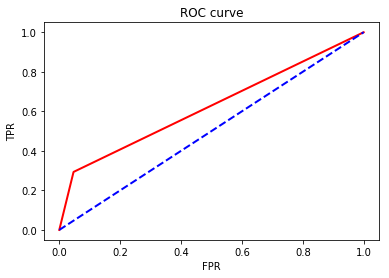

0.623259651553017

In [356]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

##Computing false and true positive rates
fpr, tpr,_=roc_curve(predictedData2,encode_binary(testData4['y']).astype('int64'),drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
auc(fpr, tpr)

In [141]:
predictedData2

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
CValue = [0.001,0.003,0.005,0.008,0.01,0.03,0.05,0.08,0.1,0.3,0.5,0.8,1]
maxiterations = [100,200,300,400,500,600,700]
class_weights = [{1:0.5,0:0.5},{1: 0.6, 0: 0.4},{1: 0.7, 0: 0.3},{1: 0.8, 0: 0.2},{1: 0.9, 0: 0.1}]
logisticDict = dict(C=CValue,max_iter=maxiterations,class_weight=class_weights)
# logisticDict = dict(maxiter=maxiterations)
# grid = GridSearchCV(clf, logisticDict, cv=6, scoring='precision')

In [247]:
def TuneHyperParameters(dictionary,clf,cv,scoring,trainX,trainY,plt):
    grid = GridSearchCV(clf, logisticDict, cv=6, scoring=scoring)
    grid.fit(trainX,trainY)
    testrange = range(1,len(grid.error_score)+1)
#     grid_validation = [x.mean_validation_score for x in grid.grid_scores_]
#     plt.plot(testrange,grid_validation)
#     for x in grid.error_score:
#         print(x)
    print(grid.cv_results_)
    print(grid.best_estimator_)
    return grid

In [248]:
len(pruned_train_X)

37000

In [249]:
grid_ = TuneHyperParameters(logisticDict,clf,6,'recall',pruned_train_X,pruned_train_Y,plt)

{'mean_fit_time': array([ 0.09555995,  0.10125498,  0.09433885,  0.09997038,  0.093641  ,
        0.0936629 ,  0.0946031 ,  0.09360238,  0.09434732,  0.0940843 ,
        0.09408895,  0.10752102,  0.09730482,  0.1022859 ,  0.10855397,
        0.10450761,  0.10143622,  0.11850985,  0.11526914,  0.10988168,
        0.11805125,  0.11279917,  0.11250063,  0.10605832,  0.10389296,
        0.09926522,  0.11864416,  0.11952945,  0.09545481,  0.09659755,
        0.09591909,  0.10798538,  0.10280188,  0.09743202,  0.09530632,
        0.14593724,  0.14687669,  0.16186674,  0.15423556,  0.17191311,
        0.16332038,  0.16352773,  0.15548646,  0.15103229,  0.14828277,
        0.166556  ,  0.15983613,  0.14996862,  0.14116128,  0.14180895,
        0.15922523,  0.16032489,  0.15895104,  0.15160779,  0.14333475,
        0.14082138,  0.14402509,  0.14262052,  0.14265458,  0.14177485,
        0.14422254,  0.14461319,  0.14508144,  0.10676193,  0.10755901,
        0.10709866,  0.10717122,  0.10761484, 

In [ ]:
evaluateTestData(testDataNumeric['y'],predictedData1)